# Análisis de series de tiempo

## Ejercicios clase 1

### Carga de librerías

In [1]:
# Importamos librerias
import pandas as pd
import numpy as np
import io
import re

%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (20, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 16
plt.rcParams["axes.grid"] =True

import psycopg2

## Ej 1 - Generar una serie de tiempo con valores aleatorios y graficarla.

In [2]:
serie1=np.random.uniform(0,1,1000)

In [3]:
serie2=np.random.normal(0,1,1000)

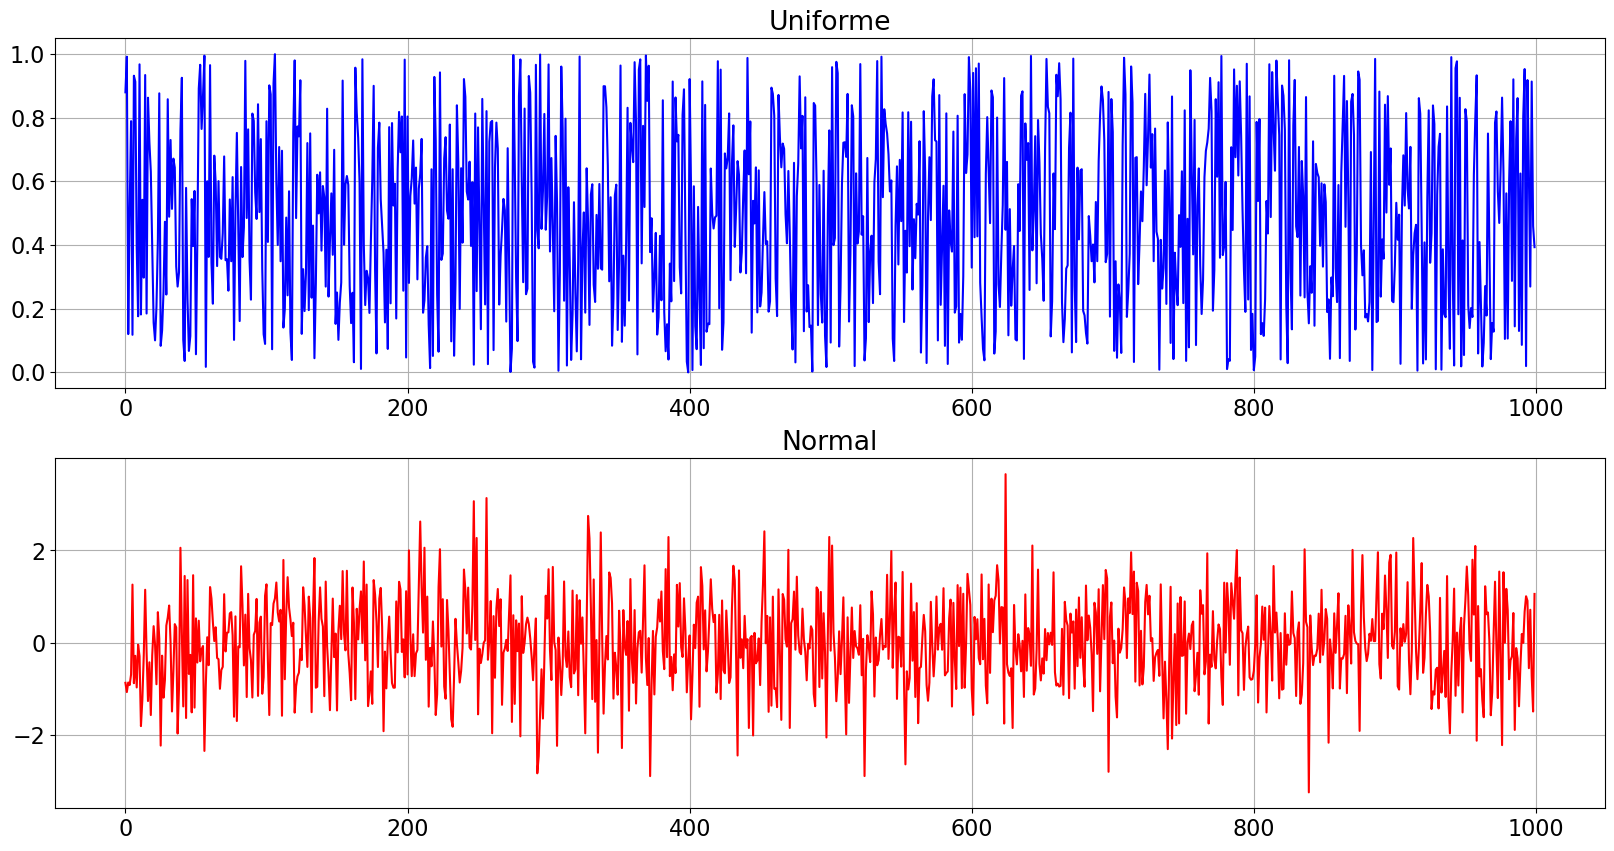

In [4]:
fig, axs = plt.subplots(2,figsize=(20, 10))
axs[0].plot(serie1,color='blue')
axs[0].set_title("Uniforme")
axs[0].grid(True)
axs[1].plot(serie2,color='red')
axs[1].set_title("Normal")
axs[1].grid(True)
plt.show()

En principio ambas series se ven *similares*, pero al graficar el histograma se observa que las distribuciones son muy diferentes

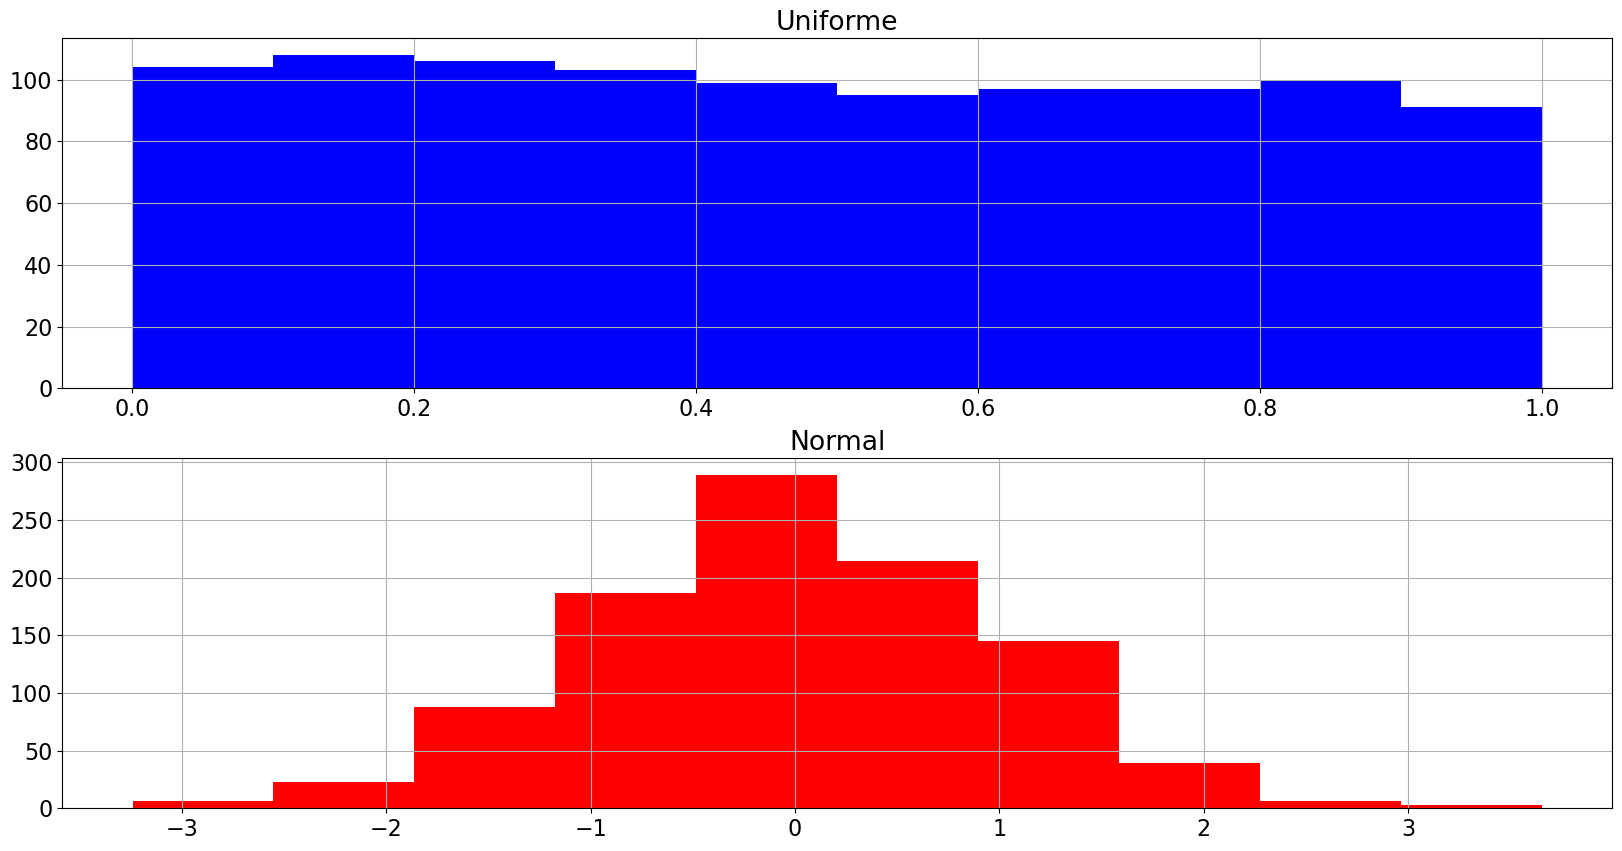

In [5]:
fig, axs = plt.subplots(2,figsize=(20, 10))
axs[0].hist(serie1,10,color='blue')
axs[0].set_title("Uniforme")
axs[0].grid(True)
axs[1].hist(serie2,10,color='red')
axs[1].set_title("Normal")
axs[1].grid(True)
plt.show()

## Ej 2 - Graficar una serie de tiempo de los ejemplos del repositorio

Ejemplo tomado: **registro_temperatura365d_smn**

In [6]:
file_serie = "registro_temperatura365d_smn.txt"

In [7]:
with open (file_serie, "r") as myfile:
    raw_serie_list=myfile.readlines()

In [8]:
for i in range(len(raw_serie_list)):
    raw_serie_list[i] = re.sub("(\s{2,})|(?<=[0-9])(\s)(?=[A-Z])|(\s)(?=[-])",";",raw_serie_list[i])

In [9]:
for i in range(len(raw_serie_list)):
    raw_serie_list[i] = re.sub(";$","",raw_serie_list[i])

In [10]:
serie = pd.read_csv(io.StringIO('\n'.join(raw_serie_list)),sep=';', 
                    on_bad_lines='skip', encoding = 'cp1250', skiprows=[3], parse_dates=[0], infer_datetime_format=True)


In [11]:
serie = serie.loc[serie['NOMBRE'] == 'ROSARIO AERO'].reset_index(drop=True)

In [12]:
serie['FECHA']= pd.to_datetime(serie['FECHA'],format="%d%m%Y")

In [13]:
serie=serie.sort_values('FECHA').reset_index(drop=True)

In [14]:
serie

,FECHA,TMAX,TMIN,NOMBRE
0,2020-10-09,28.7,5.9,ROSARIO AERO
1,2020-10-10,28.6,9.9,ROSARIO AERO
2,2020-10-11,25.6,11.6,ROSARIO AERO
3,2020-10-12,26.0,5.3,ROSARIO AERO
4,2020-10-13,28.8,8.0,ROSARIO AERO
...,...,...,...,...
360,2021-10-04,23.7,1.2,ROSARIO AERO
361,2021-10-05,24.3,6.4,ROSARIO AERO
362,2021-10-06,20.1,8.4,ROSARIO AERO
363,2021-10-07,19.8,3.0,ROSARIO AERO


In [15]:
x = serie.loc[serie['NOMBRE'] == 'ROSARIO AERO']['FECHA']
y1 = serie.loc[serie['NOMBRE'] == 'ROSARIO AERO']['TMAX'].values.astype('float')
y2 = serie.loc[serie['NOMBRE'] == 'ROSARIO AERO']['TMIN'].values.astype('float')

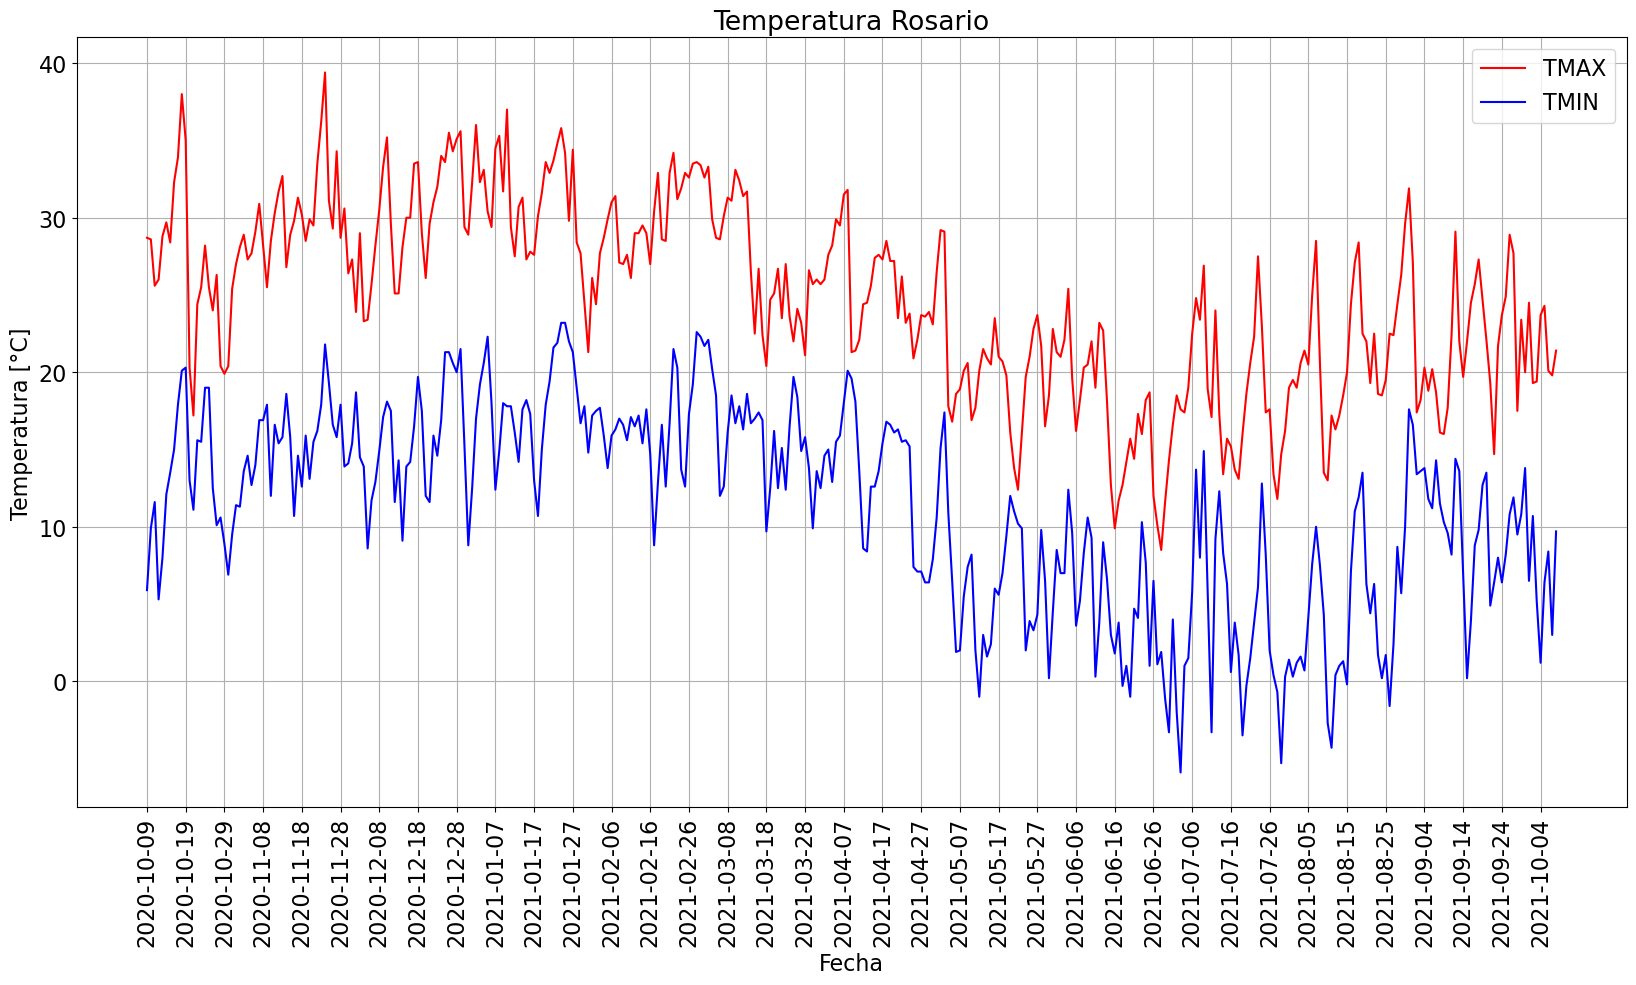

In [16]:
plt.figure(figsize=(20, 10))
plt.plot(y1, label='TMAX', c='red')
plt.plot(y2, label='TMIN', c='blue')
ticks = range(0,len(x),10)
xticks = [x[i].date() for i in ticks]
plt.xticks(ticks, xticks, rotation='vertical')
plt.xlabel('Fecha')
plt.ylabel('Temperatura [°C]')
plt.title('Temperatura Rosario')
plt.grid(True)
plt.legend()
plt.show()

--------------------------------------------------------------------------------------------------------------------------------

## Ej 3- Redactar un informe describiendo series de tiempo distintas

### Serie de tiempo 1

Cotización de acciones YPFD

In [17]:
ypfd=serie = pd.read_csv("YPFD.2000.2021.csv",sep=',', parse_dates=[1]) 

In [18]:
ypfd=ypfd.drop('Unnamed: 0',axis=1)

In [19]:
ypfd=ypfd.loc[ypfd['ultimoPrecio']!=0]

In [20]:
ypfd=ypfd.sort_values('fechaHora').reset_index(drop=True)

In [21]:
ypfd

,fechaHora,ultimoPrecio
0,2017-07-05 00:00:00.000,374.677680
1,2017-07-06 00:00:00.000,374.876448
2,2017-07-07 00:00:00.000,370.404168
3,2017-07-10 00:00:00.000,365.832504
4,2017-07-11 00:00:00.000,375.572136
...,...,...
964,2021-06-23 17:00:03.290,857.650000
965,2021-06-24 17:00:03.497,871.400000
966,2021-06-25 17:00:02.397,831.650000
967,2021-06-28 17:00:03.613,807.000000


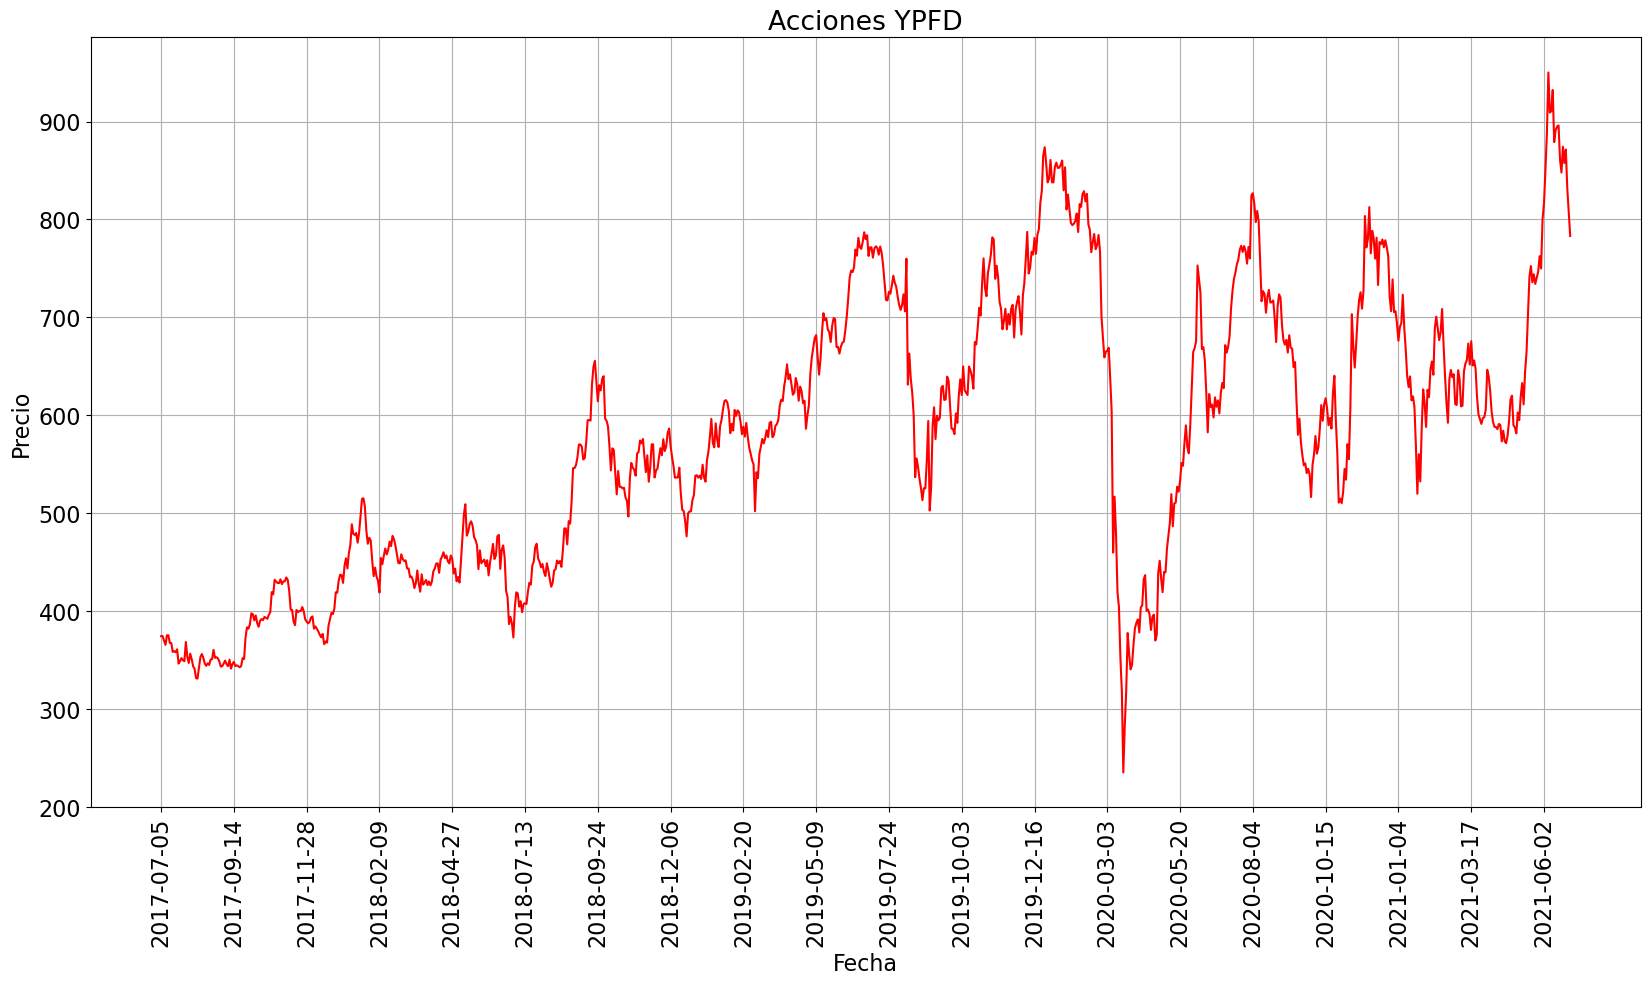

In [22]:
plt.figure(figsize=(20, 10))
plt.plot(ypfd['ultimoPrecio'], c='red')
ticks = range(0,len(ypfd['fechaHora']),50)
xticks = [ypfd['fechaHora'][i].date() for i in ticks]
plt.xticks(ticks, xticks, rotation='vertical')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title('Acciones YPFD')
plt.grid(True)
plt.show()

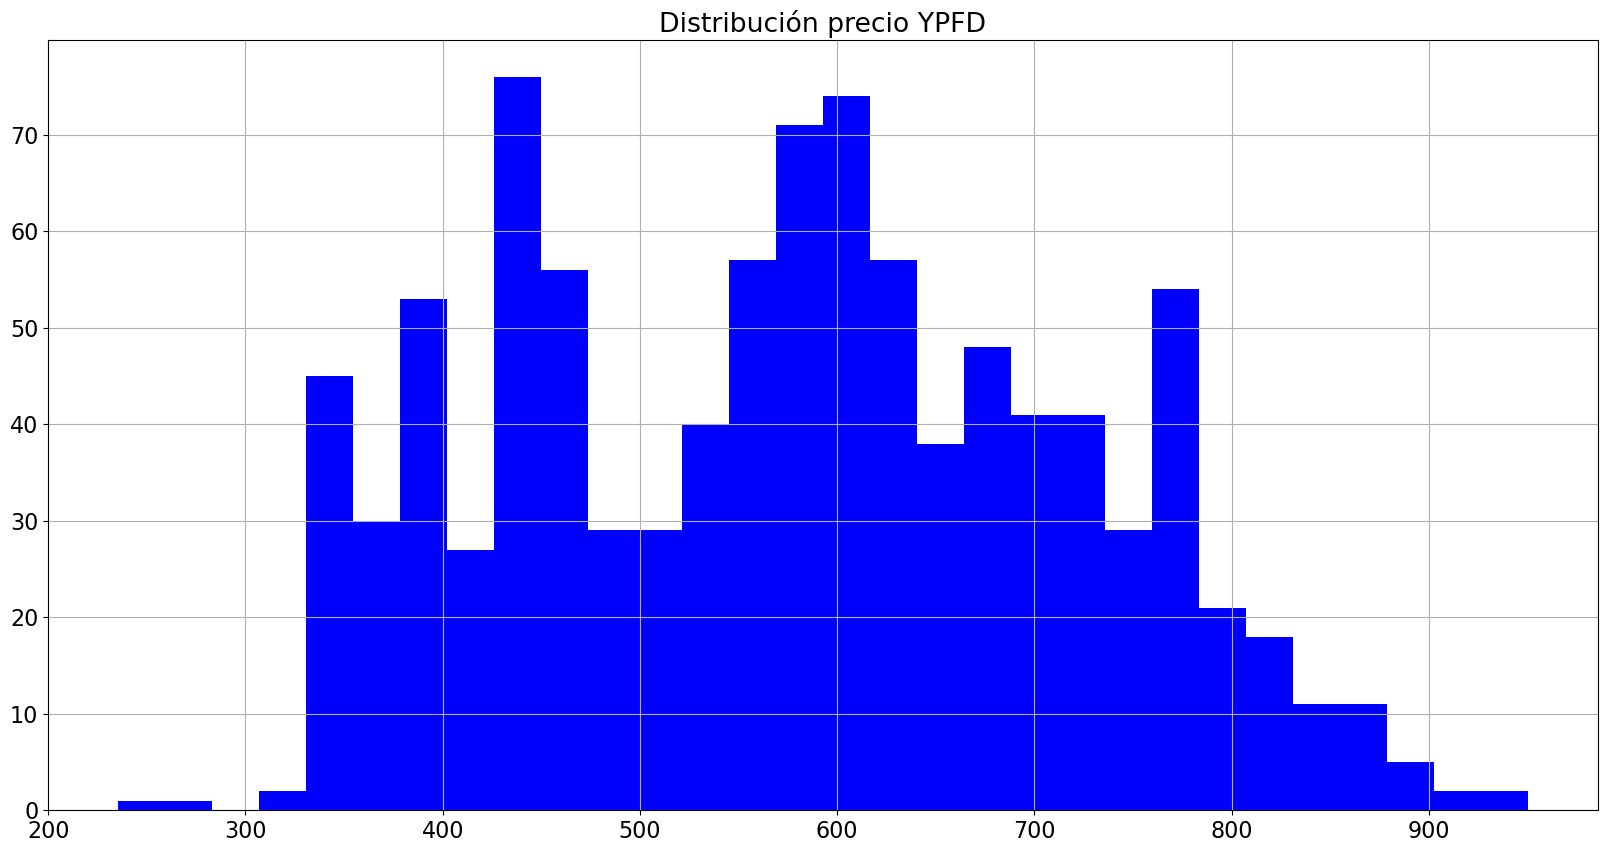

In [23]:
plt.figure(figsize=(20, 10))
plt.hist(ypfd['ultimoPrecio'],30,color='blue')
plt.title("Distribución precio YPFD")
plt.grid(True)
plt.show()

Esta serie de tiempo es:
- Discreta: ya que se obtuvieron valores en momentos específicos del tiempo.
- Univariada: la serie de tiempo esta constituida por una sola variable.
- No estacionaria.
- No gaussiana
- No lineal

Veamos algunos valores estadísticos de la misma

In [24]:
ypfd.describe()

,ultimoPrecio
count,969.000000
mean,577.803166
std,141.166125
min,235.600000
25%,451.501512
50%,584.600000
75%,682.600000
max,950.050000


### Serie de tiempo 2

Temperatura de Rosario

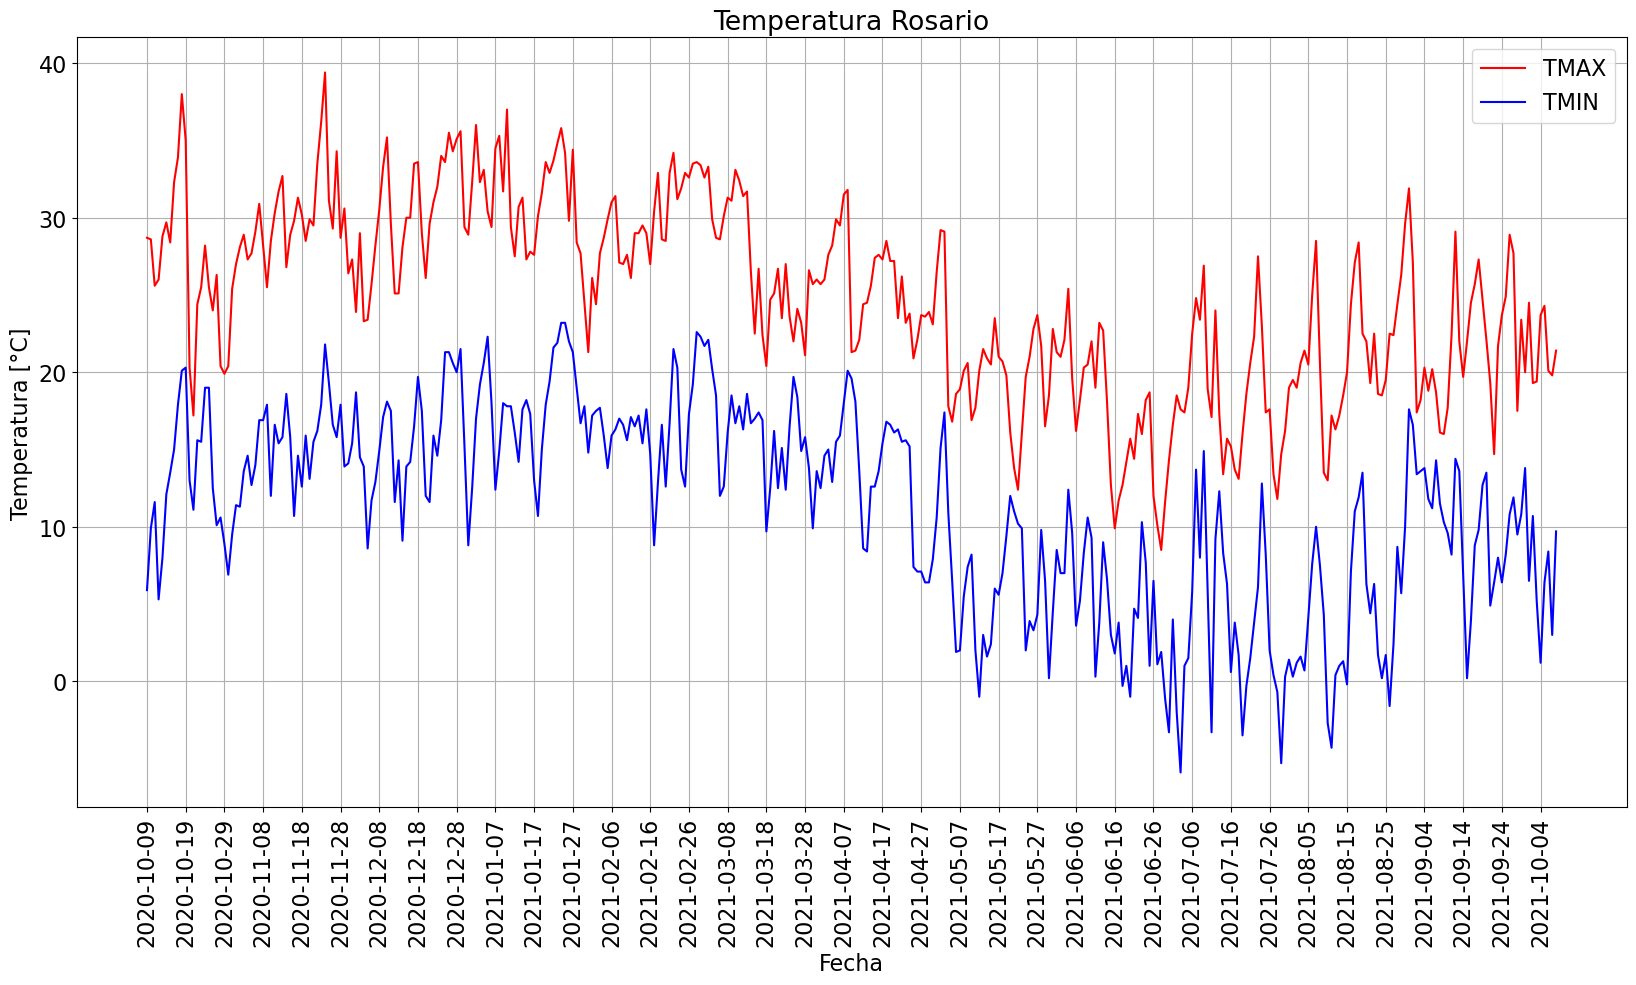

In [25]:
plt.figure(figsize=(20, 10))
plt.plot(y1, label='TMAX', c='red')
plt.plot(y2, label='TMIN', c='blue')
ticks = range(0,len(x),10)
xticks = [x[i].date() for i in ticks]
plt.xticks(ticks, xticks, rotation='vertical')
plt.xlabel('Fecha')
plt.ylabel('Temperatura [°C]')
plt.title('Temperatura Rosario')
plt.grid(True)
plt.legend()
plt.show()

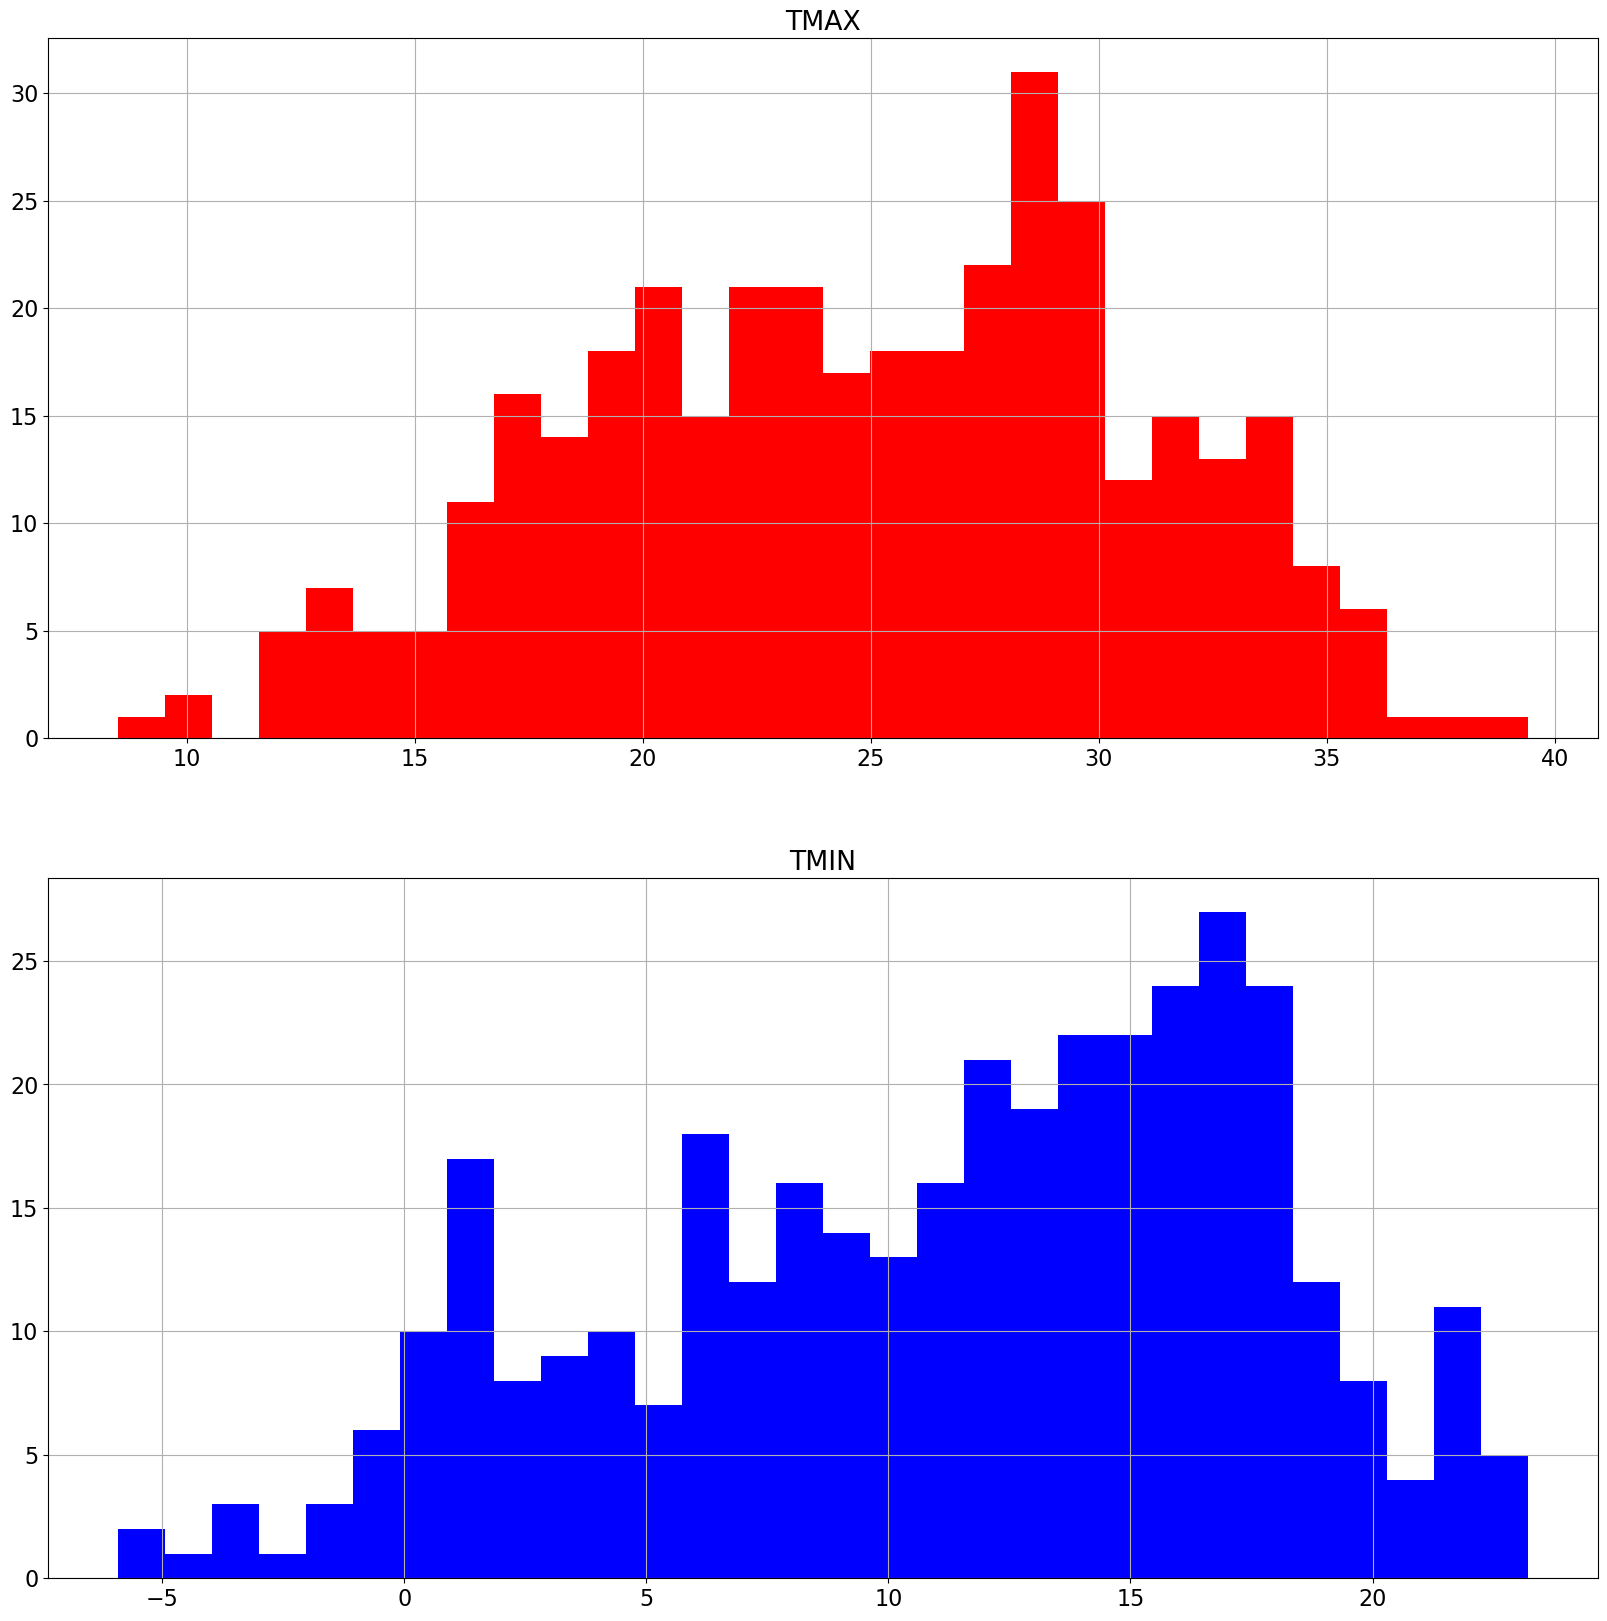

In [26]:
fig, axs = plt.subplots(2,figsize=(20, 20))
axs[0].hist(y1,30,color='red')
axs[0].set_title("TMAX")
axs[0].grid(True)
axs[1].hist(y2,30,color='blue')
axs[1].set_title("TMIN")
axs[1].grid(True)
plt.show()

Esta serie de tiempo es:
- Discreta: ya que se obtuvieron valores en momentos específicos del tiempo.
- Multivariada
- En general la señal es no estacionaria ya que las distribuciones de las temperaturas cambian con el mes y levemente con el año. Aunque mensualmente quizá se la podría considerar estacionaria.
- No gaussiana
- No lineal

### Serie de tiempo 3

Presión de circuito primario en un sistema hidráulico.

In [27]:
ps1 = pd.read_csv("PS1.txt",sep='\t', header=None)

In [28]:
ps1 = np.array(ps1)

In [29]:
ps1.shape

(2205, 6000)

In [30]:
ps1_aux=ps1.reshape(1,-1)[0]

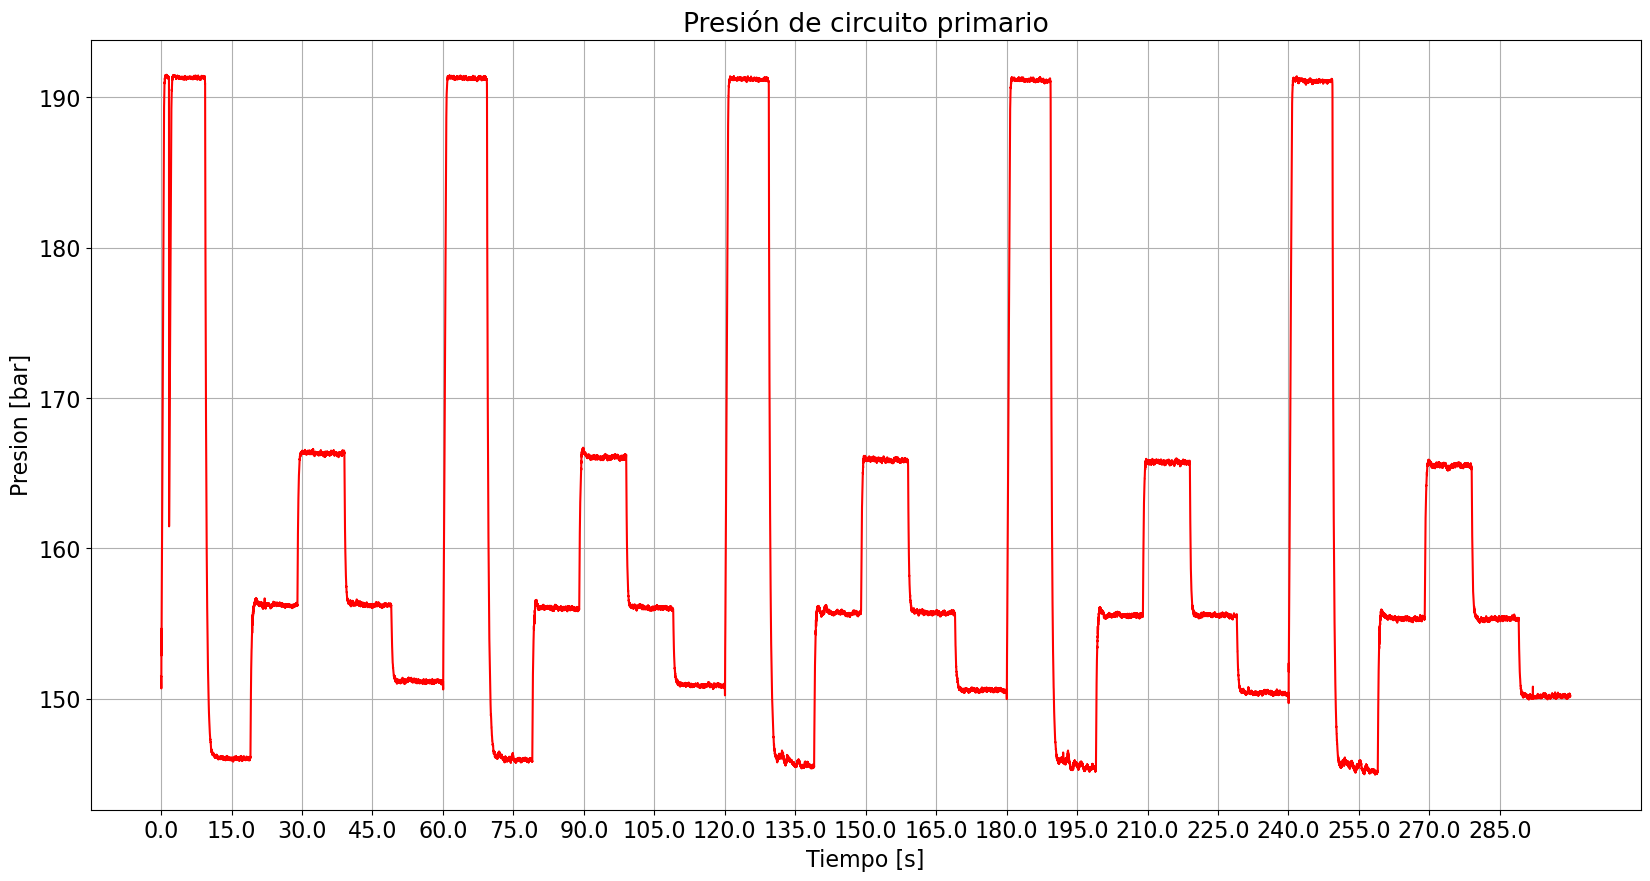

In [31]:
plt.figure(figsize=(20, 10))
plt.plot(ps1_aux[:5*6000], c='red')
ticks = range(0,len(ps1_aux[:5*6000]),int(len(ps1_aux[:5*6000])/20))
xticks = [tick/100 for tick in ticks]
plt.xticks(ticks,xticks)
plt.xlabel('Tiempo [s]')
plt.ylabel('Presion [bar]')
plt.title('Presión de circuito primario')
plt.grid(True)
plt.show()

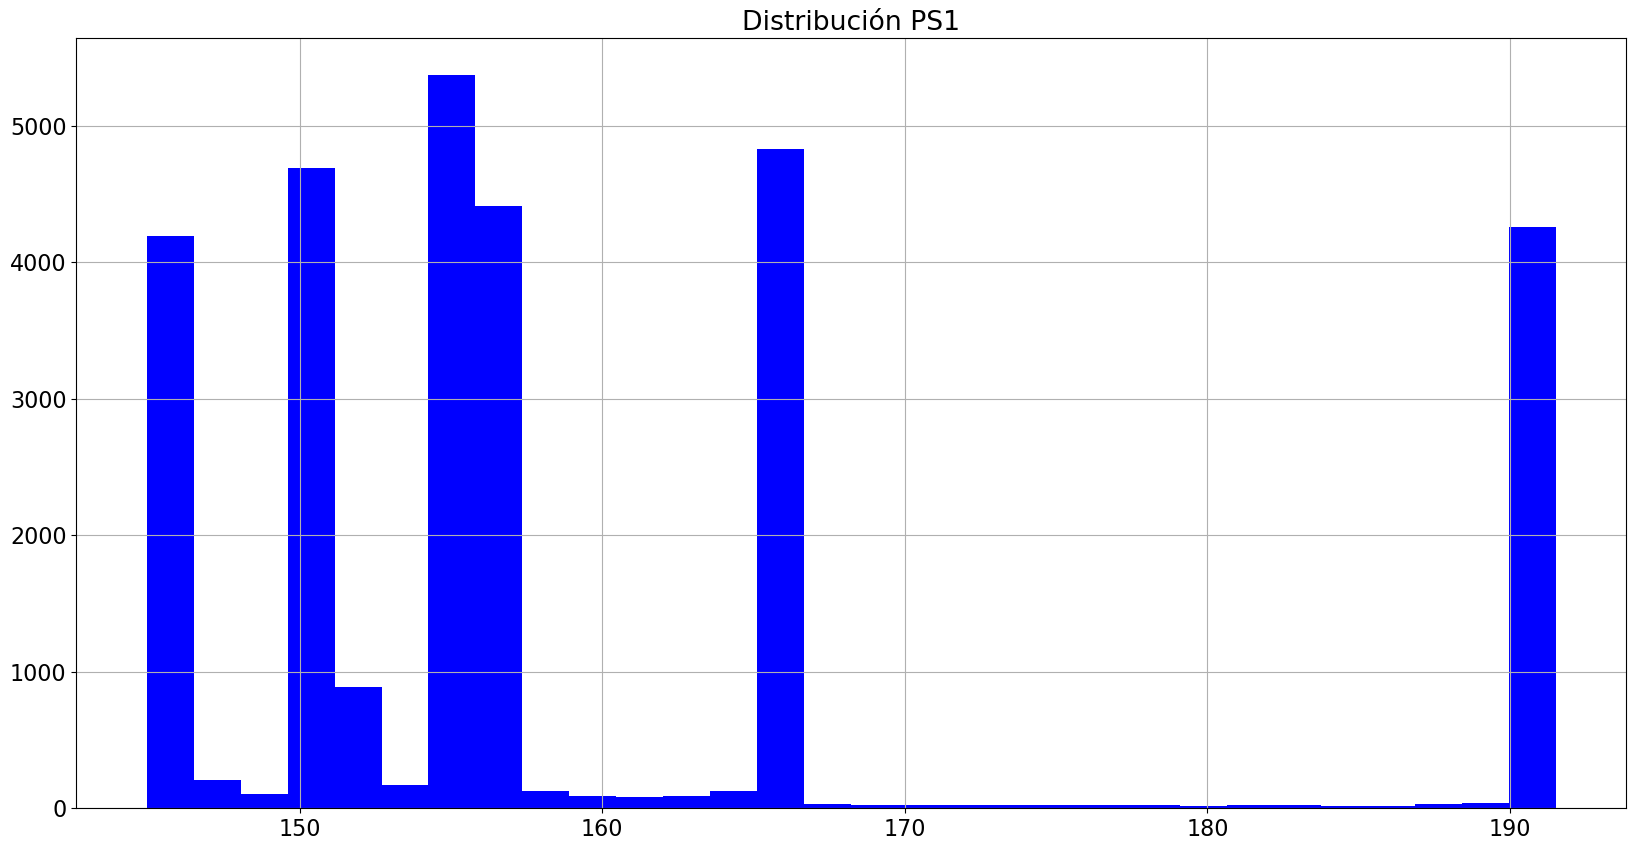

In [32]:
plt.figure(figsize=(20, 10))
plt.hist(ps1_aux[:5*6000],30,color='blue')
plt.title("Distribución PS1")
plt.grid(True)
plt.show()

Esta serie de tiempo es:
- Discreta. Si bien representa una señal continua, la serie de tiempo es la adquisición a 100 Hz (discreta) de la señal continua.
- Univariada
- Estacionaria
- No gaussiana
- No lineal

--------------------------------------------------------------------------------------------------------------------------------

## Ej 4- Crear una base de datos SQL con las tres series elegidas

Utilizando docker se crea un container de PostgreSQL.
Dado que las series de tiempo tienen bases temporales no correlaciondas, se crea una tabla para cada una y se insertan los datos

In [33]:
conn = psycopg2.connect(
    host="localhost",
    database="ASdT",
    user="CEIA",
    password="CEIA")

### Creamos las tablas

In [34]:
 commands = [
        """
        CREATE TABLE YPFD (
            fechaHora timestamp PRIMARY KEY,
            ultimoPrecio REAL NOT NULL
        )
        """,
        """ CREATE TABLE TemperaturaRosario (
                FECHA timestamp PRIMARY KEY,
                TMAX REAL NOT NULL,
                TMIN REAL NOT NULL
                )
        """,
        """ CREATE TABLE PS1 (
                cycle INTEGER,
                point REAL,
                presion REAL NOT NULL,
                PRIMARY KEY (cycle, point)
                )
        """]

In [35]:
cur = conn.cursor()

for command in commands:
    cur.execute(command)

cur.close()
conn.commit()

### Insertamos los datos

In [36]:
# Valores YPFD
command = """INSERT INTO YPFD VALUES """
for i in range(len(ypfd)-1):
    command = command + "('" + str(ypfd['fechaHora'].loc[i]) + "'," + str(ypfd['ultimoPrecio'].loc[i]) + "),"
i = len(ypfd)-1
command = command + "('" + str(ypfd['fechaHora'].loc[i]) + "'," + str(ypfd['ultimoPrecio'].loc[i]) + ");"

cur = conn.cursor()

cur.execute(command)

cur.close()
conn.commit()

In [37]:
# Valores Temperatura
command = """INSERT INTO TemperaturaRosario VALUES """
for i in range(len(x)-1):
    command = command + "('" + str(x[i]) + "'," + str(y1[i]) + "," + str(y2[i]) + "),"
i = len(x)-1
command = command + "('" + str(x[i]) + "'," + str(y1[i]) + "," + str(y2[i]) + ");"

cur = conn.cursor()

cur.execute(command)

cur.close()
conn.commit()

In [39]:
# Valores PS1
for cycle in range(ps1.shape[0]):
    
    command = """INSERT INTO PS1 VALUES """
    for point in range(ps1.shape[1]-1):
        command = command + "(" + str(cycle+1) + "," + str(point+1) + "," + str(ps1[cycle,point]) + "),"
        
    point = ps1.shape[1]-1
    command = command + "(" + str(cycle+1) + "," + str(point+1) + "," + str(ps1[cycle,point]) + ");"
    
    cur = conn.cursor()

    cur.execute(command)

    cur.close()
    conn.commit()

### Resultados

#### YPFD

<br />

<div style="clear: both">
<img src="img/sql_ypfd.jpg" style="width: 1000px;float:left">
</div>

<div style="clear: both">
</div>

<br />

#### Temperatura Rosario

<br />

<div style="clear: both">
<img src="img/sql_temperaturarosario.jpg" style="width: 1000px;float:left">
</div>

<div style="clear: both">
</div>

<br />


#### PS1

<br />

<div style="clear: both">
<img src="img/sql_ps1.jpg" style="width: 1000px;float:left">
</div>

<div style="clear: both">
</div>

<br />